In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from umap.umap_ import UMAP


70000


Text(0.5, 1.0, 'Label 8')

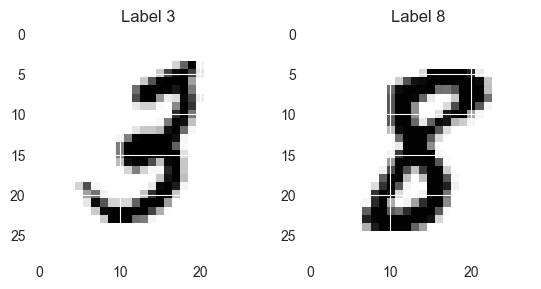

In [8]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(len(X))
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 10000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]

fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Label 3")
ax[1].set_title("Label 8")

In [3]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper


In [20]:
# T = TSNE(n_components=2, perplexity=25, random_state=123)
# TSNE_features = T.fit_transform(D)
perplexities = [5, 15, 25, 50, 100]
@timeit
def get_tsne(perplexities):
    D = X.copy()
    n_components = 2
    TSNE_dfs = []
    for perplexity in perplexities:
        tsne = TSNE(n_components, perplexity=perplexity, random_state=123)
        tsne_result = tsne.fit_transform(D)
        tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
        TSNE_dfs.append(tsne_result_df)
    return TSNE_dfs

TSNE_dfs = get_tsne(perplexities)

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\pro

Function get_tsne() {} Took 166.6338 seconds


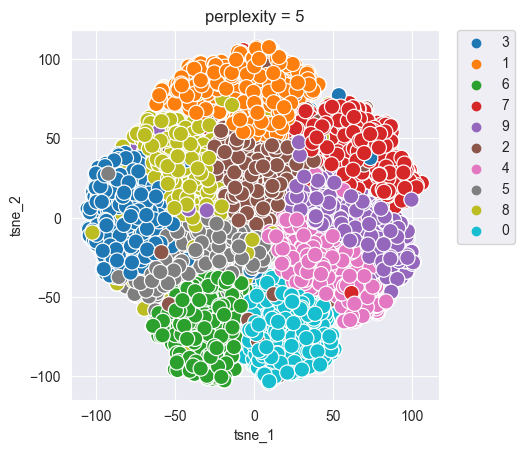

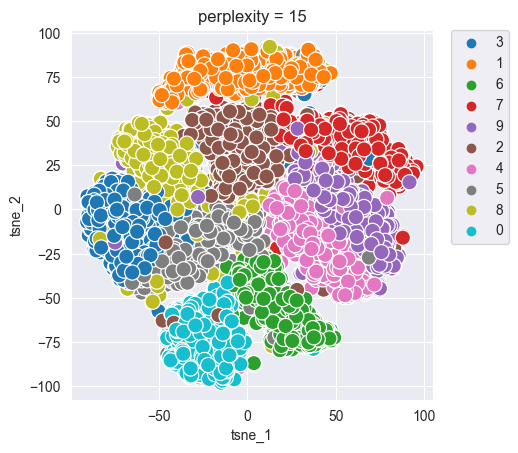

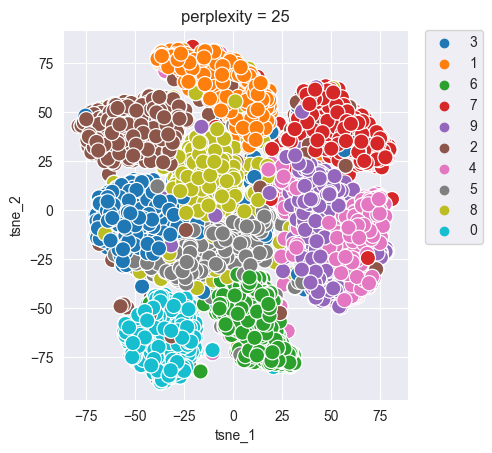

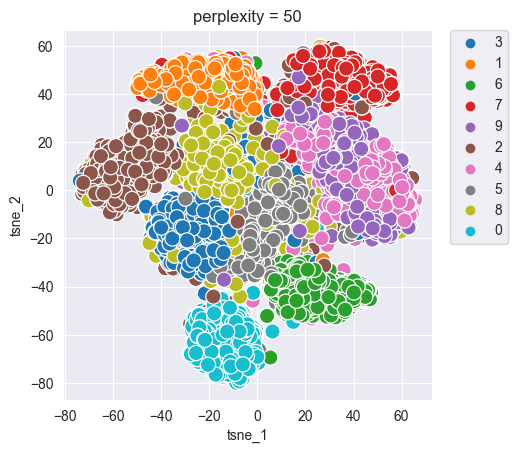

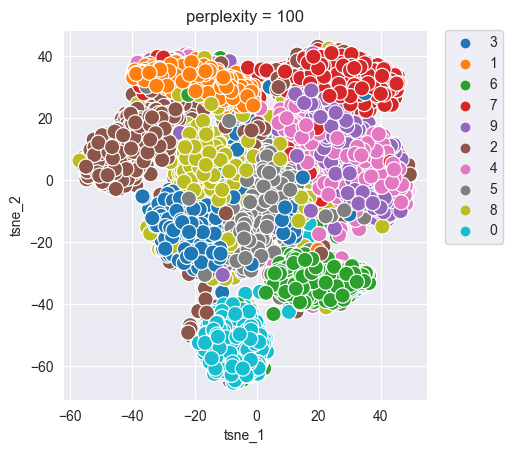

In [22]:

for perplexity, tsne_result_df in zip(perplexities, TSNE_dfs):

    fig, ax = plt.subplots(1)
    ax.set_title(f"perplexity = {perplexity}")
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [17]:
n_neighbors = (5, 25, 50)
min_dist = (0.1, 0.6)
DATA = X.copy()

@timeit
def get_umap_data(n_neighbors, min_dist, data):
    umap = {}
    for i in range(len(n_neighbors)):
        for j in range(len(min_dist)):
            umap[(n_neighbors[i],min_dist[j])]=(UMAP(n_neighbors=n_neighbors[i], min_dist=min_dist[j], random_state=123).fit_transform(data))
    return umap

um = get_umap_data(n_neighbors, min_dist, DATA)


Function get_umap_data((5, 25, 50), (0.1, 0.6), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])) {} Took 103.0346 seconds


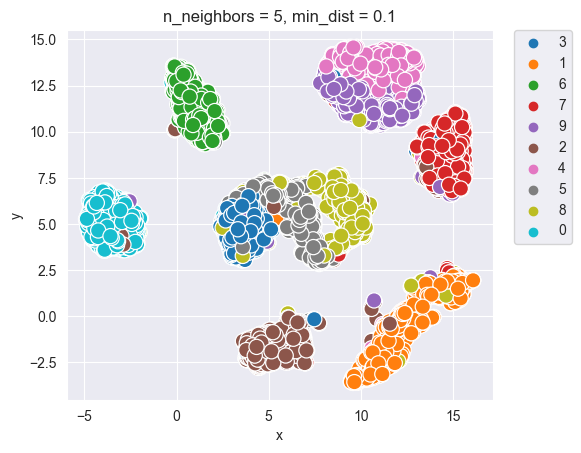

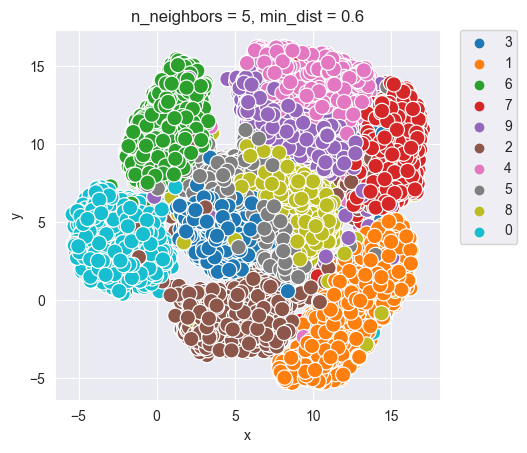

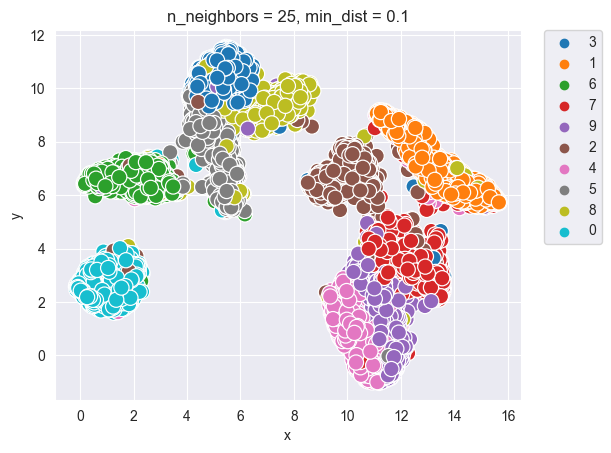

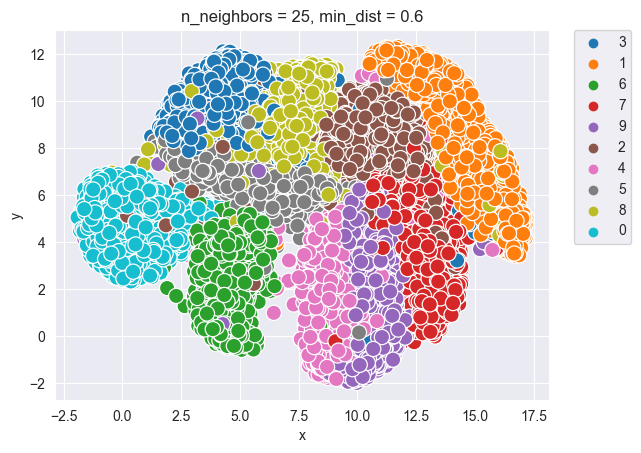

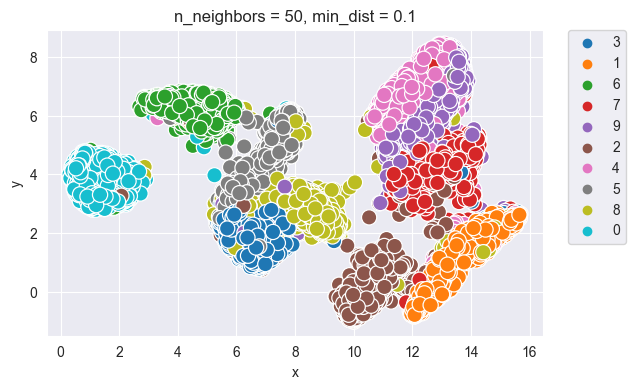

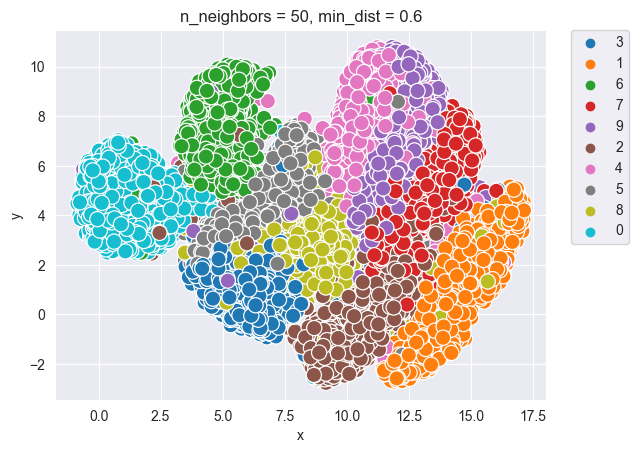

In [23]:

d = [(5, 0.1), (5, 0.6), (25, 0.1), (25, 0.6), (50, 0.1), (50, 0.6)]
for frame in d:
    result_df = pd.DataFrame({'x': um[frame][:,0], 'y': um[frame][:,1], 'label': y})
    fig, ax = plt.subplots(1)
    ax.set_title(f"n_neighbors = {frame[0]}, min_dist = {frame[1]}")
    sns.scatterplot(x='x', y='y', hue='label', data=result_df, ax=ax,s=120)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
